In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
### date column into time stamp format
df['date'] = pd.to_datetime(df['date'] , infer_datetime_format=True)
df['date']

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

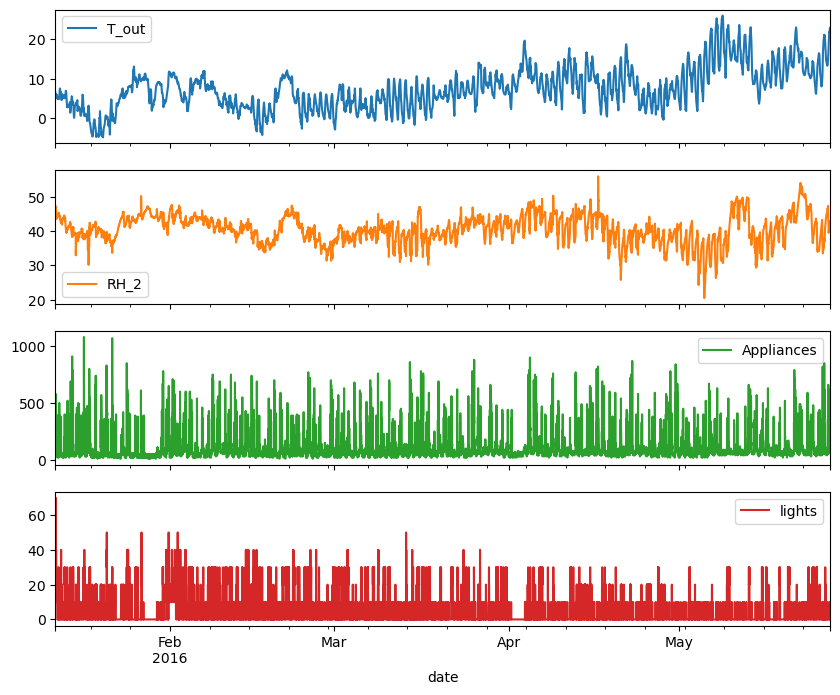

In [5]:
### corelation of some features

df.set_index('date')[['T_out' , 'RH_2' , 'Appliances' , 'lights']].plot(subplots = True)

In [6]:
df_input = df[['Appliances','T_out' , 'RH_1' , 'Visibility']]

In [7]:
df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [8]:
### summary
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [9]:

df_input.query('Appliances>500')

,Appliances,T_out,RH_1,Visibility
11,580,5.983333,46.396667,40.000000
314,520,2.900000,41.530000,36.333333
392,550,2.033333,43.433333,40.000000
393,690,2.100000,43.766667,40.000000
394,620,2.166667,43.693333,40.000000
...,...,...,...,...
19586,600,20.833333,44.066667,40.000000
19587,520,20.900000,43.366667,40.000000
19684,580,15.900000,47.226667,61.000000
19685,660,16.100000,47.693333,61.000000


In [10]:
## scale value
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)



In [11]:
print(data_scaled)

[[0.04672897 0.37299035 0.56618659 0.95384615]
 [0.04672897 0.36923901 0.54132648 0.89487179]
 [0.03738318 0.36548767 0.53050179 0.83589744]
 ...
 [0.24299065 0.88317256 0.53866618 0.37435897]
 [0.38317757 0.87888532 0.54949087 0.38717949]
 [0.39252336 0.87459807 0.53875791 0.4       ]]


In [12]:
features = data_scaled
target = data_scaled[:,0]

### Split data into training and testing

In [13]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size = 0.2 , random_state = 123 , shuffle = False)

In [14]:
x_train.shape

(15788, 4)

In [15]:
x_test.shape

(3947, 4)

In [16]:
win_length = 720
b_size = 32
num_features = 4

train_generator = TimeseriesGenerator(x_train , y_train , length=win_length , sampling_rate= 1 , batch_size= b_size )
test_generator = TimeseriesGenerator(x_test , y_test , length=win_length , sampling_rate= 1 , batch_size= b_size )

In [17]:
train_generator[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

### Model Create

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape = (win_length , num_features) , return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128 , return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64 , return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

### Model Compile

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode = 'min')


model.compile(loss = tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator , epochs=1,#should be 50
                              validation_data=test_generator,
                              shuffle= False,
                              callbacks = [early_stopping]
                              )

C:\Users\SENADHEERA\AppData\Local\Temp\ipykernel_15268\3428011652.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator , epochs=1,#should be 50


471/471 [==============================] - 723s 2s/step - loss: 0.0084 - mean_absolute_error: 0.0504 - val_loss: 0.0058 - val_mean_absolute_error: 0.0498


In [21]:
model.evaluate_generator(test_generator , verbose=0)

C:\Users\SENADHEERA\AppData\Local\Temp\ipykernel_15268\4165518954.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator , verbose=0)


[0.0057767415419220924, 0.049766380339860916]

In [28]:
## prediction
prediction = model.predict_generator(test_generator)

C:\Users\SENADHEERA\AppData\Local\Temp\ipykernel_15268\4012717064.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediction = model.predict_generator(test_generator)


In [29]:
# scaled prediction
prediction

array([[0.10268123],
       [0.09948973],
       [0.09772275],
       ...,
       [0.12706318],
       [0.12951374],
       [0.14092827]], dtype=float32)

In [34]:
df_pred = pd.concat([pd.DataFrame(prediction) , pd.DataFrame(x_test[:,1:][win_length:])] , axis=1)

In [35]:
df_pred

,0,0,1,2
0,0.102681,0.453376,0.208513,0.600000
1,0.099490,0.471061,0.182827,0.600000
2,0.097723,0.488746,0.184662,0.600000
3,0.105991,0.506431,0.193996,0.600000
4,0.118107,0.524116,0.181818,0.600000
...,...,...,...,...
3222,0.131131,0.891747,0.537657,0.348718
3223,0.129602,0.887460,0.536006,0.361538
3224,0.127063,0.883173,0.538666,0.374359
3225,0.129514,0.878885,0.549491,0.387179


In [36]:
rev_trans = scaler.inverse_transform(df_pred)

In [37]:
rev_trans

array([[119.86892089,   9.1       ,  34.6       ,  40.        ],
       [116.45401493,   9.65      ,  33.66666667,  40.        ],
       [114.56334665,  10.2       ,  33.73333333,  40.        ],
       ...,
       [145.95760792,  22.46666667,  46.59666667,  25.33333333],
       [148.57970238,  22.33333333,  46.99      ,  26.16666667],
       [160.79324722,  22.2       ,  46.6       ,  27.        ]])

In [38]:
df_final = df_input[prediction.shape[0]*-1:]

In [40]:
df_final.count()

Appliances    3227
T_out         3227
RH_1          3227
Visibility    3227
dtype: int64

In [41]:
df_final['App_pred'] = rev_trans[:,0]

C:\Users\SENADHEERA\AppData\Local\Temp\ipykernel_15268\3952543898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_pred'] = rev_trans[:,0]


In [42]:
df_final

,Appliances,T_out,RH_1,Visibility,App_pred
16508,90,9.100000,34.600000,40.000000,119.868921
16509,120,9.650000,33.666667,40.000000,116.454015
16510,390,10.200000,33.733333,40.000000,114.563347
16511,240,10.750000,34.072500,40.000000,123.410026
16512,120,11.300000,33.630000,40.000000,136.374193
...,...,...,...,...,...
19730,100,22.733333,46.560000,23.666667,150.310003
19731,90,22.600000,46.500000,24.500000,148.673742
19732,270,22.466667,46.596667,25.333333,145.957608
19733,420,22.333333,46.990000,26.166667,148.579702
